In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import PercentFormatter
from matplotlib.dates import YearLocator, DateFormatter
plt.style.use("default")
import pandas as pd

import my_functions_v13 as my
import importlib

from tqdm import tqdm
importlib.reload(my)

<module 'my_functions_v13' from '/Users/lucasumann/PycharmProjects/Masterarbeit/Notebooks/my_functions_v13.py'>

In [2]:
window_size_training = 0.1

In [3]:
number_factors = 3

In [4]:
full_coins_model = my.cond_auto_model(full_input = True, parallel_runs = 2, factor_dim=number_factors, model_name = "322 coins with intercept v13 training window "+str(window_size_training))
full_coins_model.test_percent = 1 - window_size_training

In [5]:
full_coins_model.initialize_X_Y()

In [6]:
variables = full_coins_model.X[0].columns[:-1]

In [7]:
variables = [var for var in variables]

In [8]:
variables.append("none")

In [9]:
results = {}

In [10]:
for variable in tqdm(variables):
    full_coins_model.update_contemporaneous_Y_predictions(set_var_to_zero= variable)
    full_coins_model.reset_X_Y()
    full_coins_model.calculate_contemporaneous_r2()
    relevant_Rsquared_total = 1 - ((full_coins_model.masked_Y_pred_cont_average[-1194:] - full_coins_model.masked_Y_test[-1194:])**2).sum().sum() / (full_coins_model.masked_Y_test[-1194:]**2).sum().sum()
    results[variable] = {"masked Rsquared total" : relevant_Rsquared_total}


100%|██████████| 28/28 [00:38<00:00,  1.36s/it]


In [11]:
print(results)

{'new_addresses': {'masked Rsquared total': 0.24097227478140282}, 'active_addresses': {'masked Rsquared total': 0.24096502477984982}, 'bm': {'masked Rsquared total': 0.24071768300253304}, 'volume': {'masked Rsquared total': 0.24052343527390274}, 'standard deviation volume': {'masked Rsquared total': 0.24046301129985448}, 'size': {'masked Rsquared total': 0.24018469837812917}, 'illiq': {'masked Rsquared total': 0.23949609243474212}, 'capm beta': {'masked Rsquared total': 0.23951051912859123}, 'max': {'masked Rsquared total': 0.23987371498789334}, 'capm alpha': {'masked Rsquared total': 0.24120357183523955}, 'ivol': {'masked Rsquared total': 0.2413096278686887}, 'turnover': {'masked Rsquared total': 0.2412621982843547}, 'rvol': {'masked Rsquared total': 0.24123224222107165}, 'bid-ask': {'masked Rsquared total': 0.23902319022205865}, 'detrended turnover': {'masked Rsquared total': 0.2390554893038438}, 'standard deviation turnover': {'masked Rsquared total': 0.23904922699013564}, 'rel to h

<AxesSubplot:xlabel='Variable', ylabel='Relevant Rsquared total'>

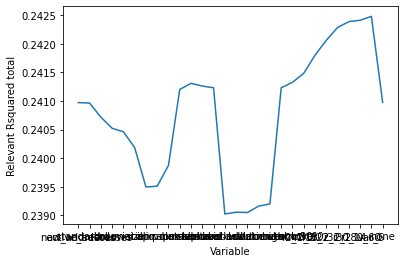

In [12]:
results_df = pd.DataFrame({"Variable": results.keys(), "Relevant Rsquared total": [value["masked Rsquared total"] for value in results.values()]})
sns.lineplot(data=results_df, x="Variable", y="Relevant Rsquared total")

In [13]:
results_df

,Variable,Relevant Rsquared total
0,new_addresses,0.240972
1,active_addresses,0.240965
2,bm,0.240718
3,volume,0.240523
4,standard deviation volume,0.240463
5,size,0.240185
6,illiq,0.239496
7,capm beta,0.239511
8,max,0.239874
9,capm alpha,0.241204


In [14]:
results_df["Delta"] = results_df["Relevant Rsquared total"] - results_df["Relevant Rsquared total"].loc[27]

In [15]:
results_df

,Variable,Relevant Rsquared total,Delta
0,new_addresses,0.240972,-0.000003
1,active_addresses,0.240965,-0.000011
2,bm,0.240718,-0.000258
3,volume,0.240523,-0.000452
4,standard deviation volume,0.240463,-0.000513
5,size,0.240185,-0.000791
6,illiq,0.239496,-0.001480
7,capm beta,0.239511,-0.001465
8,max,0.239874,-0.001102
9,capm alpha,0.241204,0.000228


In [16]:
results_df.sort_values("Delta", inplace = True)

In [17]:
np.sum(np.abs(results_df["Delta"]))

0.02527073297816007

In [18]:
results_df["Delta normalized"] = results_df["Delta"] /np.max(np.abs(results_df["Delta"]))

In [19]:
results_df = results_df[results_df["Variable"] != "none"]

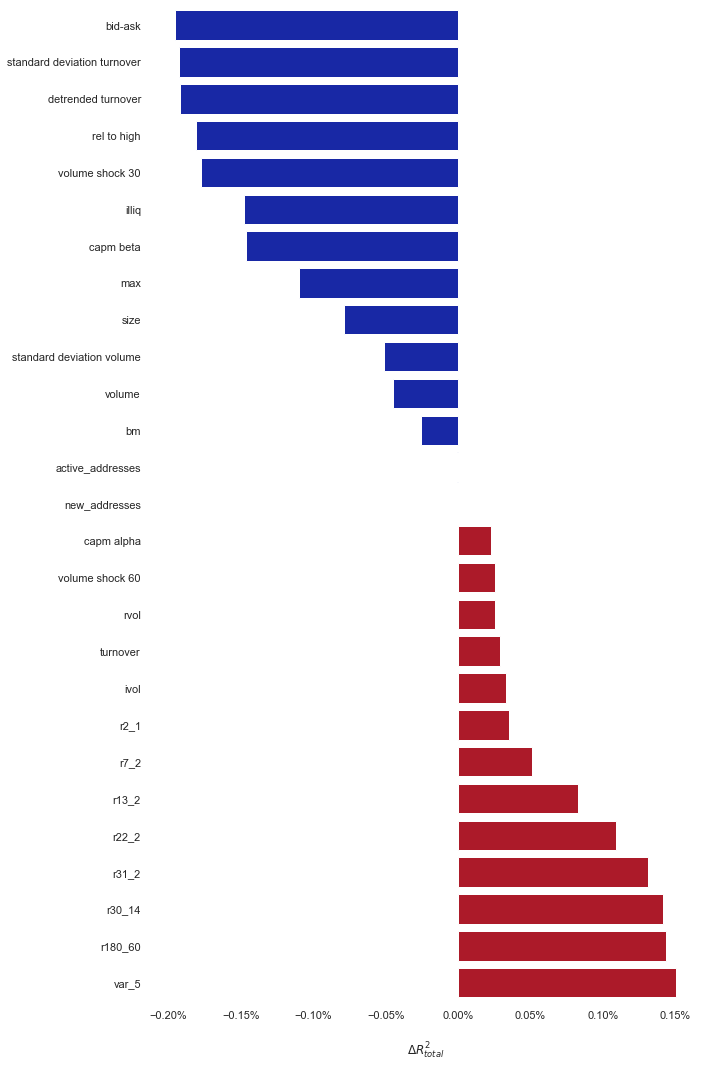

In [21]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
#define seaborn background colors
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})

sns.set_palette("deep")

cols = [[196/255, 2/255, 21/255] if (x > 0) else [0, 22/255, 189/255] for x in results_df.Delta]


fig, ax= plt.subplots(1)
sns.barplot(data = results_df, x = "Delta", y = "Variable", ax = ax, palette = cols, orient = "h")
ax.set_ylabel("")
ax.xaxis.set_major_formatter(PercentFormatter(1, decimals = 2))
ax.set_xlabel("$\Delta R^2_{total}$", rotation = 0, labelpad = 20)


fig.set_size_inches(10, 15)

plt.tight_layout()
plt.savefig("../Plots/Variable Importance.png", transparent = True, dpi = 600)